---
# Cairo University Faculty of Engineering
## Machine Learning 
## Assignment 4

---

Please write your full name here
- **Name** : "Nouran Mahmoud"

In [1]:
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# Part 1: SVM

### Use the following function to plot the classification regions

In [2]:
def plot_class_regions_for_classifier(clf, X, y, X_test=None, y_test=None, title=None, target_names = None, plot_decision_regions = True):

    numClasses = np.amax(y) + 1
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    cmap_light = ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = ListedColormap(color_list_bold[0:numClasses])

    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    x2, y2 = np.meshgrid(np.arange(x_min-k, x_max+k, h), np.arange(y_min-k, y_max+k, h))
    # np.c_ Translates slice objects to concatenation along the second axis
    # e.g. np.c_[np.array([[1,2,3]]), 0, 0, np.array([[4,5,6]])]
    # ravel() Returns a contiguous flattened array.
    # x = np.array([[1, 2, 3], [4, 5, 6]])
    # np.ravel(x) = [1 2 3 4 5 6]
    P = clf.predict(np.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)
    plt.figure()
    if plot_decision_regions:
        plt.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    plt.xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    plt.ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_test is not None):
        plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        plt.legend(loc=0, handles=legend_handles)

    if (title is not None):
        plt.title(title)
    plt.show()

### Use the following dataset in questions 1, 2, and 3.

In [3]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)

#### Question 1
Split the data into training and testing datasets (use random_state=0 and 25% of the data for testing)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

#### Question 2
1. Train an SVM classifier using linear kernel.
2. Plot the classification regions using the training dataset.

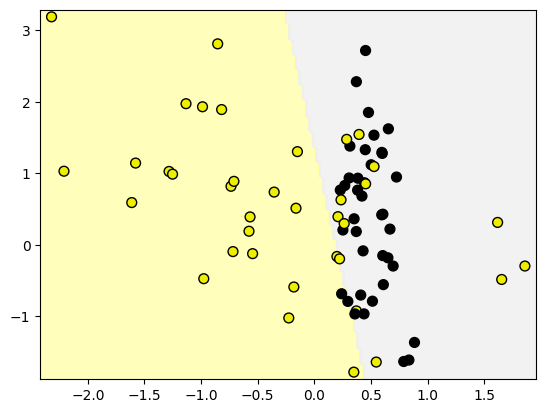

In [6]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
clf = make_pipeline(StandardScaler(), LinearSVC(dual="auto", random_state=0, tol=1e-5))
clf.fit(X_train, y_train)
plot_class_regions_for_classifier(clf=clf, X=X_train, y=y_train)

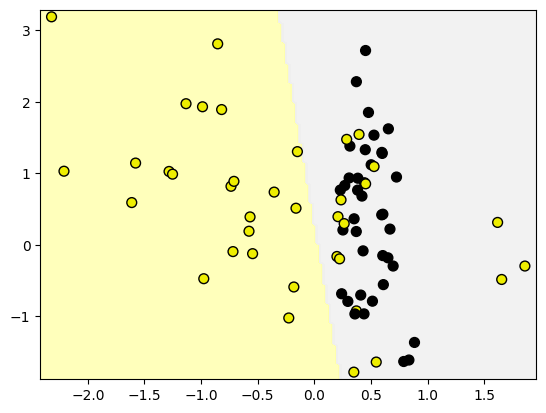

In [8]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

plot_class_regions_for_classifier(clf=svm_classifier, X=X_train, y=y_train)

#### Question 3
1. Train an SVM classifier using linear kernel with C=0.0001.
2. Train another SVM classifier using linear kernel with C=95
3. Plot the classification regions for both cases using the training dataset.
4. Comment on the results.

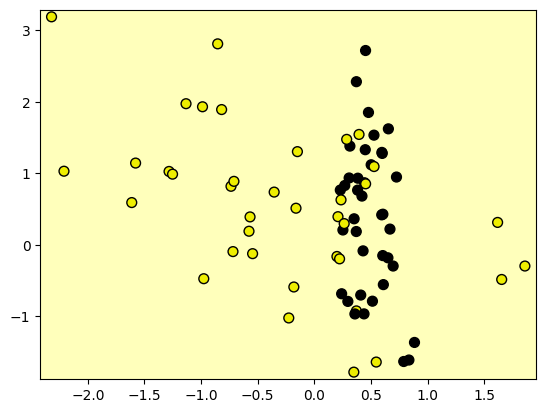

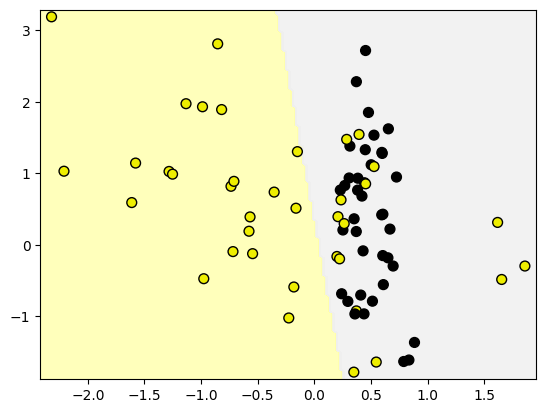

In [9]:
clf1 = SVC(kernel='linear', C=0.0001)
clf1.fit(X_train, y_train)
clf2 = SVC(kernel='linear', C=95)
clf2.fit(X_train, y_train)
plot_class_regions_for_classifier(clf1, X_train, y_train)
plot_class_regions_for_classifier(clf2, X_train, y_train)

C is a Regularization parameter. The strength of the regularization is inversely proportional to C. So the first one supposed to be strongly regularized with led to a case of underfitting and very weak seperation of the parameters.

### Use the fruits dataset in questions 4, 5, 6.

In [10]:
import pandas as pd
fruits = pd.read_table('fruit_data_with_colors.txt')
feature_names_fruits = ['height', 'width', 'mass', 'color_score']

In [26]:
fruits['fruit_label'].unique()


array([1, 2, 3, 4], dtype=int64)

In [13]:
fruits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fruit_label    59 non-null     int64  
 1   fruit_name     59 non-null     object 
 2   fruit_subtype  59 non-null     object 
 3   mass           59 non-null     int64  
 4   width          59 non-null     float64
 5   height         59 non-null     float64
 6   color_score    59 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.4+ KB


#### Question 4
1. Split the data by columns into X_fruits and y_fruits where X_fruits is the data records and y_fruits is the labels.
2. Using only the **'height'** and **'width'** features, split the data into training and testing using random_state=0, and 25% of the data for testing.
3. Using **sklearn LinearSVC**, train a linear svm

In [15]:
X_fruits , y_fruits = fruits[['height', 'width']], fruits['fruit_label']
X_fruits_train, X_fruits_test, y_fruits_train, y_fruits_test = train_test_split(X_fruits, y_fruits, test_size=0.25, random_state=0)
fruits_SVC_clf = SVC(kernel='linear')
fruits_SVC_clf.fit(X_fruits_train,y_fruits_train)


SVC(kernel='linear')

#### Question 5
For the previous model from question 4. 
1. How many SVM models have been trained? and Why?
2. Print the models' coefficients and intercepts.

In [17]:
# 1- 4 As the decision_function_shape is ovr (one-vs-rest) by default, meaning that there's a binary classification model for each class
print(fruits_SVC_clf.coef_, fruits_SVC_clf.class_weight_)

[[ 0.74999906  0.24999969]
 [-1.0247669   0.17846357]
 [-1.10094816  1.55993033]
 [-0.73131977 -0.31796512]
 [-0.71065935  0.05076138]
 [-1.13258578  1.89213469]] [1. 1. 1. 1.]


#### Question 6
Plot the classification boundary of each svm on a scatter plot of the training data. 
(plot it any way you can)

c:\Users\nouran\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\nouran\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\nouran\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\nouran\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


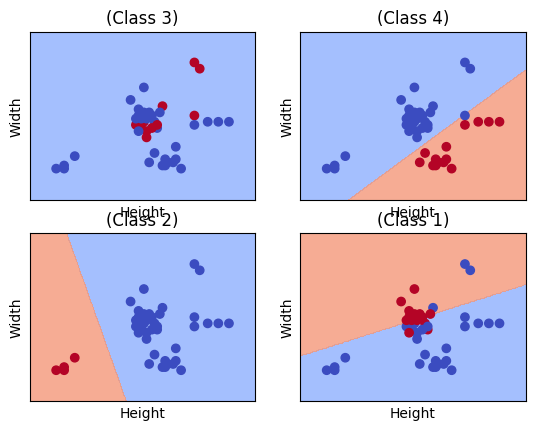

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm

# Create a mesh grid for our graph
x_min, x_max = X_fruits_train['height'].min() - 1, X_fruits_train['height'].max() + 1
y_min, y_max = X_fruits_train['width'].min() - 1, X_fruits_train['width'].max() + 1
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Create a 2x2 subplot
fig, axs = plt.subplots(2, 2)

# Get the unique labels
labels = y_fruits_train.unique()

# For each label, create a one-vs-rest classifier and plot its decision boundary
for i, label in enumerate(labels):
    # Create a binary target vector (1 for samples of this class, 0 for all others)
    y_binary = y_fruits_train == label

    # Train a one-vs-rest SVM
    clf = svm.SVC(kernel='linear', C=1.0)
    clf.fit(X_fruits_train, y_binary)

    # Classify each block of the mesh (used to assign its color)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    # Plot the classification boundary on the corresponding subplot
    row = i // 2
    col = i % 2
    axs[row, col].contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    axs[row, col].scatter(X_fruits_train['height'], X_fruits_train['width'], c=y_binary, cmap=plt.cm.coolwarm)
    axs[row, col].set_xlabel('Height')
    axs[row, col].set_ylabel('Width')
    axs[row, col].set_xlim(xx.min(), xx.max())
    axs[row, col].set_ylim(yy.min(), yy.max())
    axs[row, col].set_xticks(())
    axs[row, col].set_yticks(())
    axs[row, col].set_title(f'(Class {label})')
    

# Display the plots
plt.show()


 Use the breast cancer dataset in question 7, 8, and9.

In [25]:
from sklearn.datasets import load_breast_cancer
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

#### Question 7
1. Split the dataset into training and testing datasets, use random_state = 0, and 25% of the data for testing.
2. Use GridSearchCV to find the best C value for and SVM classifier with rbf kernel and print the best C value. *use:*  
```python
parameters = {'kernel' : ('poly', 'rbf'), 'C':[0.001, 0.01, 0.1, 0.5, 1, 10]}
```
3. Print the best parameters resulted from your grid search.

In [31]:
from sklearn.model_selection import GridSearchCV
X_cancer_train, X_cancer_test, y_cancer_train, y_cancer_test = train_test_split(X_cancer, y_cancer, test_size=0.25, random_state=0)
cancer_SVC_clf = SVC()
# cancer_SVC_clf.fit(X_cancer_train, X_cancer_test)
parameters = {'kernel' : ('poly', 'rbf'), 'C':[0.001, 0.01, 0.1, 0.5, 1, 10]}
gridsearch=GridSearchCV(estimator = cancer_SVC_clf,
                        param_grid = parameters,
                        scoring='accuracy',
                        cv=10,
                        n_jobs=-1)
gridsearch=gridsearch.fit(X_cancer_train,y_cancer_train)
print(gridsearch.best_params_)

{'C': 10, 'kernel': 'rbf'}


#### Question 8
Train an SVM model using the best parameters resulted from question 7, then calculate and print the training and testing accuracy.

In [34]:
cancer_SVC_clf = SVC(C = 10, kernel='rbf')
cancer_SVC_clf.fit(X_cancer_train, y_cancer_train)
train_acc = cancer_SVC_clf.score(X_cancer_train, y_cancer_train)
test_acc= cancer_SVC_clf.score(X_cancer_test, y_cancer_test)
print(f" Train ACC. is {train_acc} and Test ACC. is {test_acc}")

 Train ACC. is 0.9154929577464789 and Test ACC. is 0.9370629370629371


#### Question 9
Improve the previous results from question 8.

**Hint:** Don't change the model, instead, make some preprocessing on the data.

In [37]:
cancer_SVC_clf_preprocessing = make_pipeline(StandardScaler(), SVC(C = 10, kernel='rbf', random_state=0))
cancer_SVC_clf_preprocessing.fit(X_cancer_train, y_cancer_train)
train_acc_new_hopefully = cancer_SVC_clf_preprocessing.score(X_cancer_train, y_cancer_train)
test_acc_new_hopefully = cancer_SVC_clf_preprocessing.score(X_cancer_test, y_cancer_test)
print(f" Train ACC. is {train_acc_new_hopefully} and Test ACC. is {test_acc_new_hopefully}")

 Train ACC. is 0.9882629107981221 and Test ACC. is 0.993006993006993


WOW, significant improvement